# Fake news prediction 

In [3]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lokesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.shape

(20800, 5)

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
df = df.fillna('')

In [11]:
#merging the author and news title
df["content"] = df['author']+''+df["title"]

In [12]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [13]:
X = df.drop('label',axis=1)
y = df["label"]

In [14]:
X

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard PortnoyIranian woman jailed for fiction...
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,"Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Michael J. de la Merced and Rachel AbramsMacy’...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","Alex AnsaryNATO, Russia To Hold Parallel Exerc..."


In [15]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [16]:
# Stemming is the process of reducing a word to its Root words. Example: actor,actress,acting = act  
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [18]:
df['content'] = df['content'].apply(stemming)

In [19]:
print(df['content'])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


In [20]:
#seperating the data and label
X = df['content'].values
y = df['label'].values

In [21]:
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


In [22]:
print(y)

[1 0 1 ... 0 1 1]


In [23]:
y.shape

(20800,)

In [24]:
# converting textual data to numerical data 
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [25]:
print(X)

  (np.int32(0), np.int32(578))	0.2694167078545384
  (np.int32(0), np.int32(4211))	0.36253203231506576
  (np.int32(0), np.int32(5006))	0.24725958235728157
  (np.int32(0), np.int32(5969))	0.35488202138141456
  (np.int32(0), np.int32(6273))	0.2839932825877812
  (np.int32(0), np.int32(8022))	0.2313366174248873
  (np.int32(0), np.int32(12782))	0.24619727512767192
  (np.int32(0), np.int32(14555))	0.2917725968420029
  (np.int32(0), np.int32(15019))	0.4300622675963931
  (np.int32(0), np.int32(22724))	0.25523360180691607
  (np.int32(0), np.int32(26340))	0.2808837940159642
  (np.int32(1), np.int32(2622))	0.3562953366945267
  (np.int32(1), np.int32(3281))	0.18652439327549428
  (np.int32(1), np.int32(3859))	0.45980466668763476
  (np.int32(1), np.int32(4767))	0.23338756776626793
  (np.int32(1), np.int32(5916))	0.31810058109638056
  (np.int32(1), np.int32(8772))	0.5258635625386451
  (np.int32(1), np.int32(11313))	0.24166773097712638
  (np.int32(1), np.int32(27923))	0.36911845953845024
  (np.int32(2)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,y_train)

In [29]:
print(training_data_accuracy)

0.971875


In [30]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,y_test)

In [31]:
test_data_accuracy

0.9550480769230769

In [32]:
# making a predicitve system 
X_new = X_test[6]
prediction = model.predict(X_new)
if (prediction[0]==0):
    print("The news is absolutely real")
else:
    print("The news is fake ")

The news is absolutely real


In [33]:
print(prediction)

[0]


In [34]:
import pickle

In [35]:
filename = "fakeNews.sav"
pickle.dump(model,open(filename,'wb'))


In [36]:
loaded_model = pickle.load(open('fakeNews.sav','rb'))

NameError: name 'data' is not defined

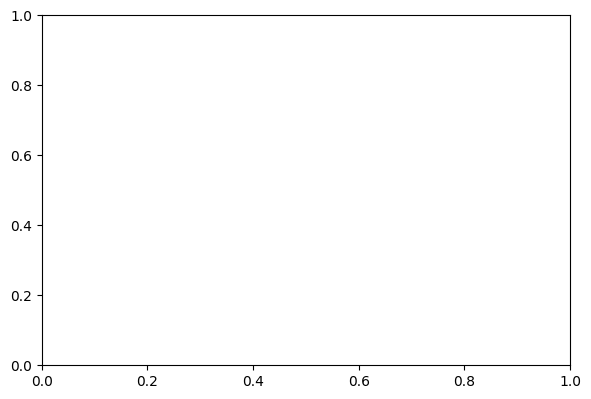

In [41]:
# Scatter plots for selected feature pairs, colored by Outcome
feature_pairs = [
    ("Glucose", "BMI"),
    ("Age", "Insulin"),
    ("BloodPressure", "SkinThickness"),
    ("Pregnancies", "DiabetesPedigreeFunction")
]

plt.figure(figsize=(15, 10))
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data, x=x_feature, y=y_feature, hue="Outcome", palette="coolwarm", alpha=0.7)
    plt.title(f"{x_feature} vs. {y_feature}")
plt.suptitle("Scatter Plots of Feature Pairs by Outcome", fontsize=16)
plt.tight_layout()
plt.show()
